# Import

In [106]:
# data processing
import pandas as pd
import numpy as np
from scipy.signal import medfilt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

In [63]:
df = pd.read_csv('../src/data/raw/train.csv')

In [4]:
df.head(10)

,row_id,well_id,GR,label
0,0,0,99.005617,0
1,1,0,105.563944,0
2,2,0,105.921065,0
3,3,0,113.513354,0
4,4,0,101.523783,0
5,5,0,94.464482,0
6,6,0,103.864994,0
7,7,0,104.410065,0
8,8,0,95.934506,0
9,9,0,107.290773,0


# Target exploration

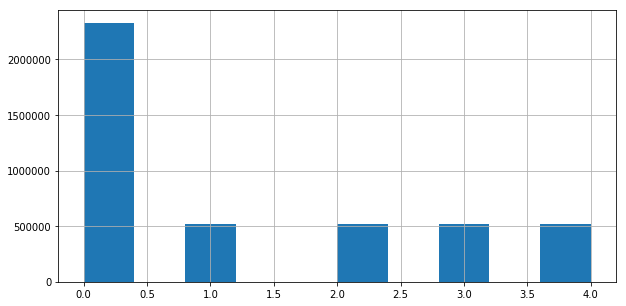

In [35]:
#distribution of labels
df['label'].hist(figsize=(10, 5))

In [142]:
print('class 0 is ',df[df['label'] == 0].shape[0]/df.shape[0],'% of the overall dataset')
print('class 1 is ',df[df['label'] == 1].shape[0]/df.shape[0],'% of the overall dataset')
print('class 2 is ',df[df['label'] == 2].shape[0]/df.shape[0],'% of the overall dataset')
print('class 3 is ',df[df['label'] == 3].shape[0]/df.shape[0],'% of the overall dataset')

class 0 is  0.5286625 % of the overall dataset
class 1 is  0.11849363636363637 % of the overall dataset
class 2 is  0.11773613636363636 % of the overall dataset
class 3 is  0.11706363636363637 % of the overall dataset


Target is imbalanced

# Plots

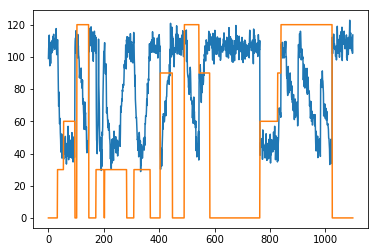

In [36]:
#plot of the time-series over the time
plt.figure()
plt.plot(df[df['well_id'] == 0]['GR'].values)
plt.plot(df[df['well_id'] == 0]['label'].values*30)
plt.show()

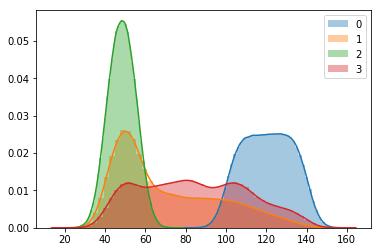

In [64]:
#distribution
plt.figure()
sns.distplot(df[df['label'] == 0]['GR'].values)
sns.distplot(df[df['label'] == 1]['GR'].values)
sns.distplot(df[df['label'] == 2]['GR'].values)
sns.distplot(df[df['label'] == 3]['GR'].values)
plt.legend(['0','1','2','3'])
plt.show()

Looks like it's not a problem to distinglish 0 and 2; 1,3 could be problematic

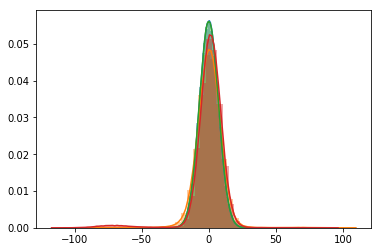

In [38]:
plt.figure()
sns.distplot(np.diff(df[df['label'] == 0]['GR'].values))
sns.distplot(np.diff(df[df['label'] == 1]['GR'].values))
sns.distplot(np.diff(df[df['label'] == 2]['GR'].values))
sns.distplot(np.diff(df[df['label'] == 3]['GR'].values))
plt.legend(['0','1','2','3'])
plt.show()

seems like AWGN was added to data

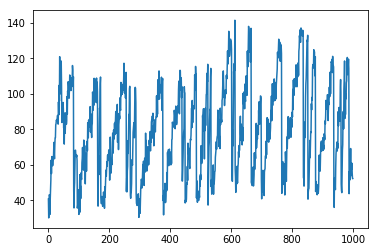

In [82]:
plt.figure()
plt.plot(df[df['label'] == 3]['GR'].values[0:1000])
plt.show()

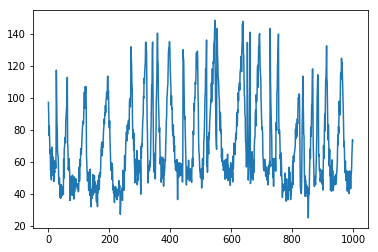

In [99]:
plt.figure()
plt.plot(df[df['label'] == 1]['GR'].values[9000:10000])
plt.show()

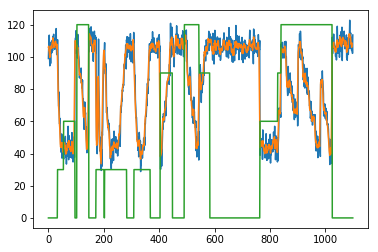

In [101]:
x = df[df['well_id'] == 0]['GR'].values
N = 4
x1 = np.convolve(x, np.ones((N,))/N, mode='valid')

plt.figure()
plt.plot(x)
plt.plot(x1)
plt.plot(df[df['well_id'] == 0]['label'].values*30)
plt.show()

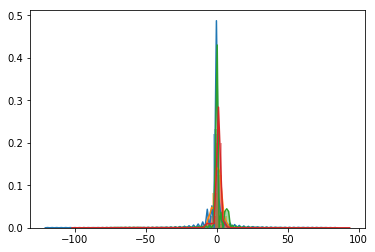

In [72]:
df['GR_1'] = 0
df['GR_1'].iloc[:-N+1] = np.convolve(df['GR'].values, np.ones((N,))/N, mode='valid')

plt.figure()
sns.distplot(np.diff(df[df['label'] == 0]['GR_1'].values))
sns.distplot(np.diff(df[df['label'] == 1]['GR_1'].values))
sns.distplot(np.diff(df[df['label'] == 2]['GR_1'].values))
sns.distplot(np.diff(df[df['label'] == 3]['GR_1'].values))

plt.show()

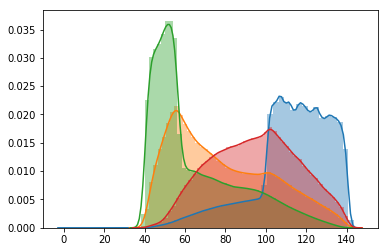

In [66]:
plt.figure()
sns.distplot(df[df['label'] == 0]['GR_1'].values)
sns.distplot(df[df['label'] == 1]['GR_1'].values)
sns.distplot(df[df['label'] == 2]['GR_1'].values)
sns.distplot(df[df['label'] == 3]['GR_1'].values)

plt.show()

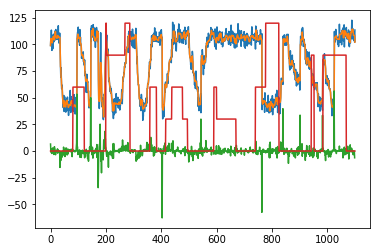

In [105]:
x = df[df['well_id'] == 0]['GR'].values
N = 5
x1 = medfilt(x,N)

plt.figure()
plt.plot(x)
plt.plot(x1)
plt.plot(np.diff(x1))
plt.plot(df[df['well_id'] == 1]['label'].values*30)
plt.show()

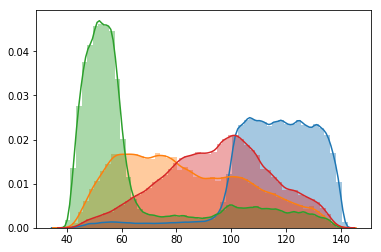

In [97]:
df['GR_mf'] = medfilt(df['GR'].values,N)

plt.figure()
sns.distplot(df[df['label'] == 0]['GR_mf'].values)
sns.distplot(df[df['label'] == 1]['GR_mf'].values)
sns.distplot(df[df['label'] == 2]['GR_mf'].values)
sns.distplot(df[df['label'] == 3]['GR_mf'].values)

plt.show()

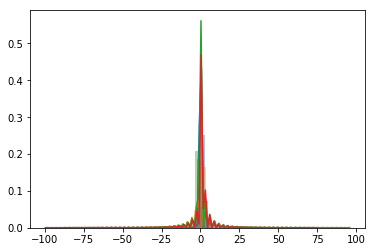

In [90]:
plt.figure()
sns.distplot(np.diff(df[df['label'] == 0]['GR_mf'].values))
sns.distplot(np.diff(df[df['label'] == 1]['GR_mf'].values))
sns.distplot(np.diff(df[df['label'] == 2]['GR_mf'].values))
sns.distplot(np.diff(df[df['label'] == 3]['GR_mf'].values))

plt.show()

# scaler

In [108]:
#standard scaler
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

In [135]:
df['GR_mf'] = medfilt(df['GR'].values,51)

GR = df['GR_mf'].values
id = df['well_id']

for i in list(df['well_id'].unique()):
    GR[np.where(id == i)] = scaler_mm.fit_transform(np.reshape(GR[id == i],[GR[id == i].shape[0],1]))[:,0]
    
df['GR_mf'] = GR

C:\Users\Dmitrii\Anaconda3\envs\tf-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


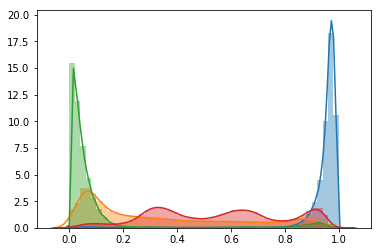

In [136]:
plt.figure()
sns.distplot(df[df['label'] == 0]['GR_mf'].values)
sns.distplot(df[df['label'] == 1]['GR_mf'].values)
sns.distplot(df[df['label'] == 2]['GR_mf'].values)
sns.distplot(df[df['label'] == 3]['GR_mf'].values)

plt.show()

In [ ]:
df['GR_mf'] = medfilt(df['GR'].values,51)

GR = df['GR_mf'].values
id = df['well_id']

for i in list(df['well_id'].unique()):
    GR[np.where(id == i)] = scaler_std.fit_transform(np.reshape(GR[id == i],[GR[id == i].shape[0],1]))[:,0]
    
df['GR_mf'] = GR

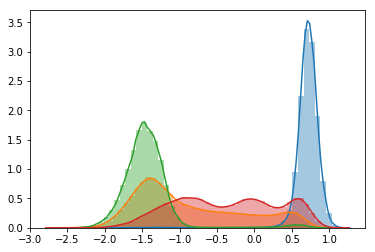

In [129]:
df['GR_mf'] = medfilt(df['GR'].values,31)

plt.figure()
sns.distplot(df[df['label'] == 0]['GR_mf'].values)
sns.distplot(df[df['label'] == 1]['GR_mf'].values)
sns.distplot(df[df['label'] == 2]['GR_mf'].values)
sns.distplot(df[df['label'] == 3]['GR_mf'].values)

plt.show()

# Exprolarion of train destribution

In [145]:
test = pd.read_csv('../src/data/raw/test.csv')

In [138]:
test.head(10)

,row_id,well_id,GR
0,0,5000,134.943504
1,1,5000,127.004675
2,2,5000,133.159255
3,3,5000,134.411762
4,4,5000,135.748644
5,5,5000,124.695214
6,6,5000,141.253217
7,7,5000,137.763622
8,8,5000,131.665785
9,9,5000,140.515328


In [146]:
test = test.drop('GR',axis=1)

test['label'] = 0
test.to_csv('../src/data/submit/dummy_0.csv',index=False)

test['label'] = 1
test.to_csv('../src/data/submit/dummy_1.csv',index=False)

test['label'] = 2
test.to_csv('../src/data/submit/dummy_2.csv',index=False)

test['label'] = 3
test.to_csv('../src/data/submit/dummy_3.csv',index=False)